In [1]:
##Folder to print results
folder_results = "Results/Montpellier"
folder_station = "../mystations"
##Station
file = [folder_station * "/" * typedata * "_Montpellier.txt" for typedata in ["TN", "TX"]]

##AR model
p = 1
method_ = "monthly"
periodicity_model = "trigo"       # "trigo", "smooth", "autotrigo", "stepwise_trigo"
degree_period = 8                     # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
Trendtype = "LOESS"                   # "LOESS", "polynomial", "null" (for no additive trend)
trendparam = nothing                  # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1
σ_periodicity_model = "trigo"     # "trigo", "smooth", "autotrigo", "stepwise_trigo", "null" (for no multiplicative periodicity)
σ_degree_period = 8                   # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
σ_Trendtype = "LOESS"                 # "LOESS", "polynomial", "null" (for no multiplicative trend)
σ_trendparam = nothing                # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1

##Simulations
n = 10

10

In [2]:
include("table_reader.jl")
include("utils/Missing_values.jl")
include("utils/Structure.jl")
include("utils/Plotting.jl")
cd(@__DIR__)

ERROR: LoadError: too many parameters for type AbstractInterpolation
Stacktrace:
 [1] top-level scope
   @ C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:28
 [2] include
   @ .\Base.jl:557 [inlined]
 [3] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::String)
   @ Base .\loading.jl:2881
 [4] top-level scope
   @ stdin:6
in expression starting at C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:3
in expression starting at stdin:6
┌ Error: Error during loading of extension SparseConnectivityTracerDataInterpolationsExt of SparseConnectivityTracer, use `Base.retry_load_extensions()` to retry.
│   exception = 1-element ExceptionStack:
Failed to precompile SparseConnectivityTracerDataInterpolationsExt [

In [3]:
settings = OrderedDict((("file", file),
    ("p", p),
    ("method_", method_),
    ("periodicity_model", periodicity_model),
    ("degree_period", degree_period),
    ("Trendtype", Trendtype),
    ("trendparam", trendparam),
    ("σ_periodicity_model", σ_periodicity_model),
    ("σ_degree_period", σ_degree_period),
    ("σ_Trendtype", σ_Trendtype),
    ("σ_trendparam", σ_trendparam),
    ("n", n)))

OrderedDict{String, Any} with 12 entries:
  "file"                => ["../mystations/TN_Montpellier.txt", "../mystations/…
  "p"                   => 1
  "method_"             => "monthly"
  "periodicity_model"   => "trigo"
  "degree_period"       => 8
  "Trendtype"           => "LOESS"
  "trendparam"          => nothing
  "σ_periodicity_model" => "trigo"
  "σ_degree_period"     => 8
  "σ_Trendtype"         => "LOESS"
  "σ_trendparam"        => nothing
  "n"                   => 10

In [4]:
series_vec = truncate_MV.(extract_series.(file))
date_vec, x = Common_indexes(series_vec)

Caracteristics_Series_vec = init_CaracteristicsSeries.(series_vec)

2-element Vector{CaracteristicsSeries}:
 CaracteristicsSeries([2.7129870129870137, 2.6025974025974032, 2.4688311688311684, 2.583116883116883, 1.7454545454545447, 2.0909090909090917, 1.846753246753246, 1.8402597402597405, 2.106493506493506, 2.6259740259740254  …  3.3259740259740265, 3.9220779220779223, 3.511688311688312, 2.98961038961039, 2.594805194805195, 2.2194805194805194, 2.7857142857142856, 2.8000000000000016, 2.757142857142857, 2.8909090909090915], [11.9, 11.2, 9.5, 12.3, 10.8, 10.5, 12.2, 11.5, 10.6, 10.6  …  13.3, 13.0, 11.4, 12.4, 12.3, 11.0, 12.8, 14.3, 11.1, 11.2], 12×4 DataFrame
 Row │ MONTH  MONTHLY_MEAN  MONTHLY_STD  MONTHLY_MAX 
     │ Int64  Float64       Float64      Float64     
─────┼───────────────────────────────────────────────
   1 │     1       2.42266      4.33502         14.5
   2 │     2       3.14257      4.35576         15.3
   3 │     3       5.50913      3.69526         15.1
   4 │     4       8.25918      2.98022         17.3
   5 │     5      11.8933   

In [5]:
Model = fit_Multi_AR(x, date_vec,
    p=p,
    method_=method_,
    periodicity_model=periodicity_model,
    degree_period=degree_period,
    Trendtype=Trendtype,
    trendparam=trendparam,
    σ_periodicity_model=σ_periodicity_model,
    σ_degree_period=σ_degree_period,
    σ_Trendtype=σ_Trendtype,
    σ_trendparam=σ_trendparam)


Multi_MonthlyAR([[[0.5141442226501148 0.22892178969978944; 0.06569821350276903 0.6532871805527518]], [[0.5332689704819576 0.22913856637582392; 0.11419409786703878 0.6418873557935005]], [[0.48552795895810563 0.1726790502708262; 0.06554909813601845 0.5954630207001131]], [[0.40580924941591995 0.18264491898625546; 0.06978367803571017 0.551770288147051]], [[0.4203384698553126 0.17994285156949033; 0.07648451293890762 0.5790843873956392]], [[0.4334521844057869 0.26057360145516983; 0.12168873310051107 0.5444735210337935]], [[0.4551755191526195 0.19851385654110296; 0.15894211313537 0.4879475862381434]], [[0.45484623807117897 0.12405112996293718; 0.13900158897894618 0.4868808796729378]], [[0.520019938323243 0.10293799557332582; 0.1309081041565865 0.5423290672810342]], [[0.5744124878188371 0.09172453798678017; 0.12177728383679436 0.5835141151347549]], [[0.5139003213958457 0.20759491015873602; 0.084496984370431 0.5959669448977024]], [[0.5036096297203215 0.23371445704796523; 0.0768628670429761 0.62

In [6]:
sample_ = rand(Model, n)

10-element Vector{Matrix{Float64}}:
 [2.0 5.800000000000002; -3.0839914273321325 3.7185340896489185; … ; 6.320501673695266 10.42581146693763; 7.567720068803869 13.532967466030234]
 [2.0 5.800000000000002; -5.927105194936933 0.8809570608206556; … ; 7.845785960100923 14.994447149784934; 7.200899401079823 12.528180830778945]
 [2.0 5.800000000000002; -1.2520133020330189 5.009128625903226; … ; -1.7778116280698617 10.646603161909146; 1.2116675366879766 10.009102507629787]
 [2.0 5.800000000000002; -0.2179946502950827 7.086181057489078; … ; 1.8058156296219843 13.44089515268175; 0.4619977555982242 8.911539777954042]
 [2.0 5.800000000000002; 2.072851316268121 11.336650061365718; … ; -1.943083798515305 7.4454231631625385; -0.1001462205652448 14.271191790903842]
 [2.0 5.800000000000002; -2.2833917856006463 7.847631755589515; … ; -0.7212379664383377 7.614482590785815; -0.8240414427125282 5.607969861014884]
 [2.0 5.800000000000002; -5.876951273055181 -1.135423000317484; … ; -0.33251374448249127 12.0

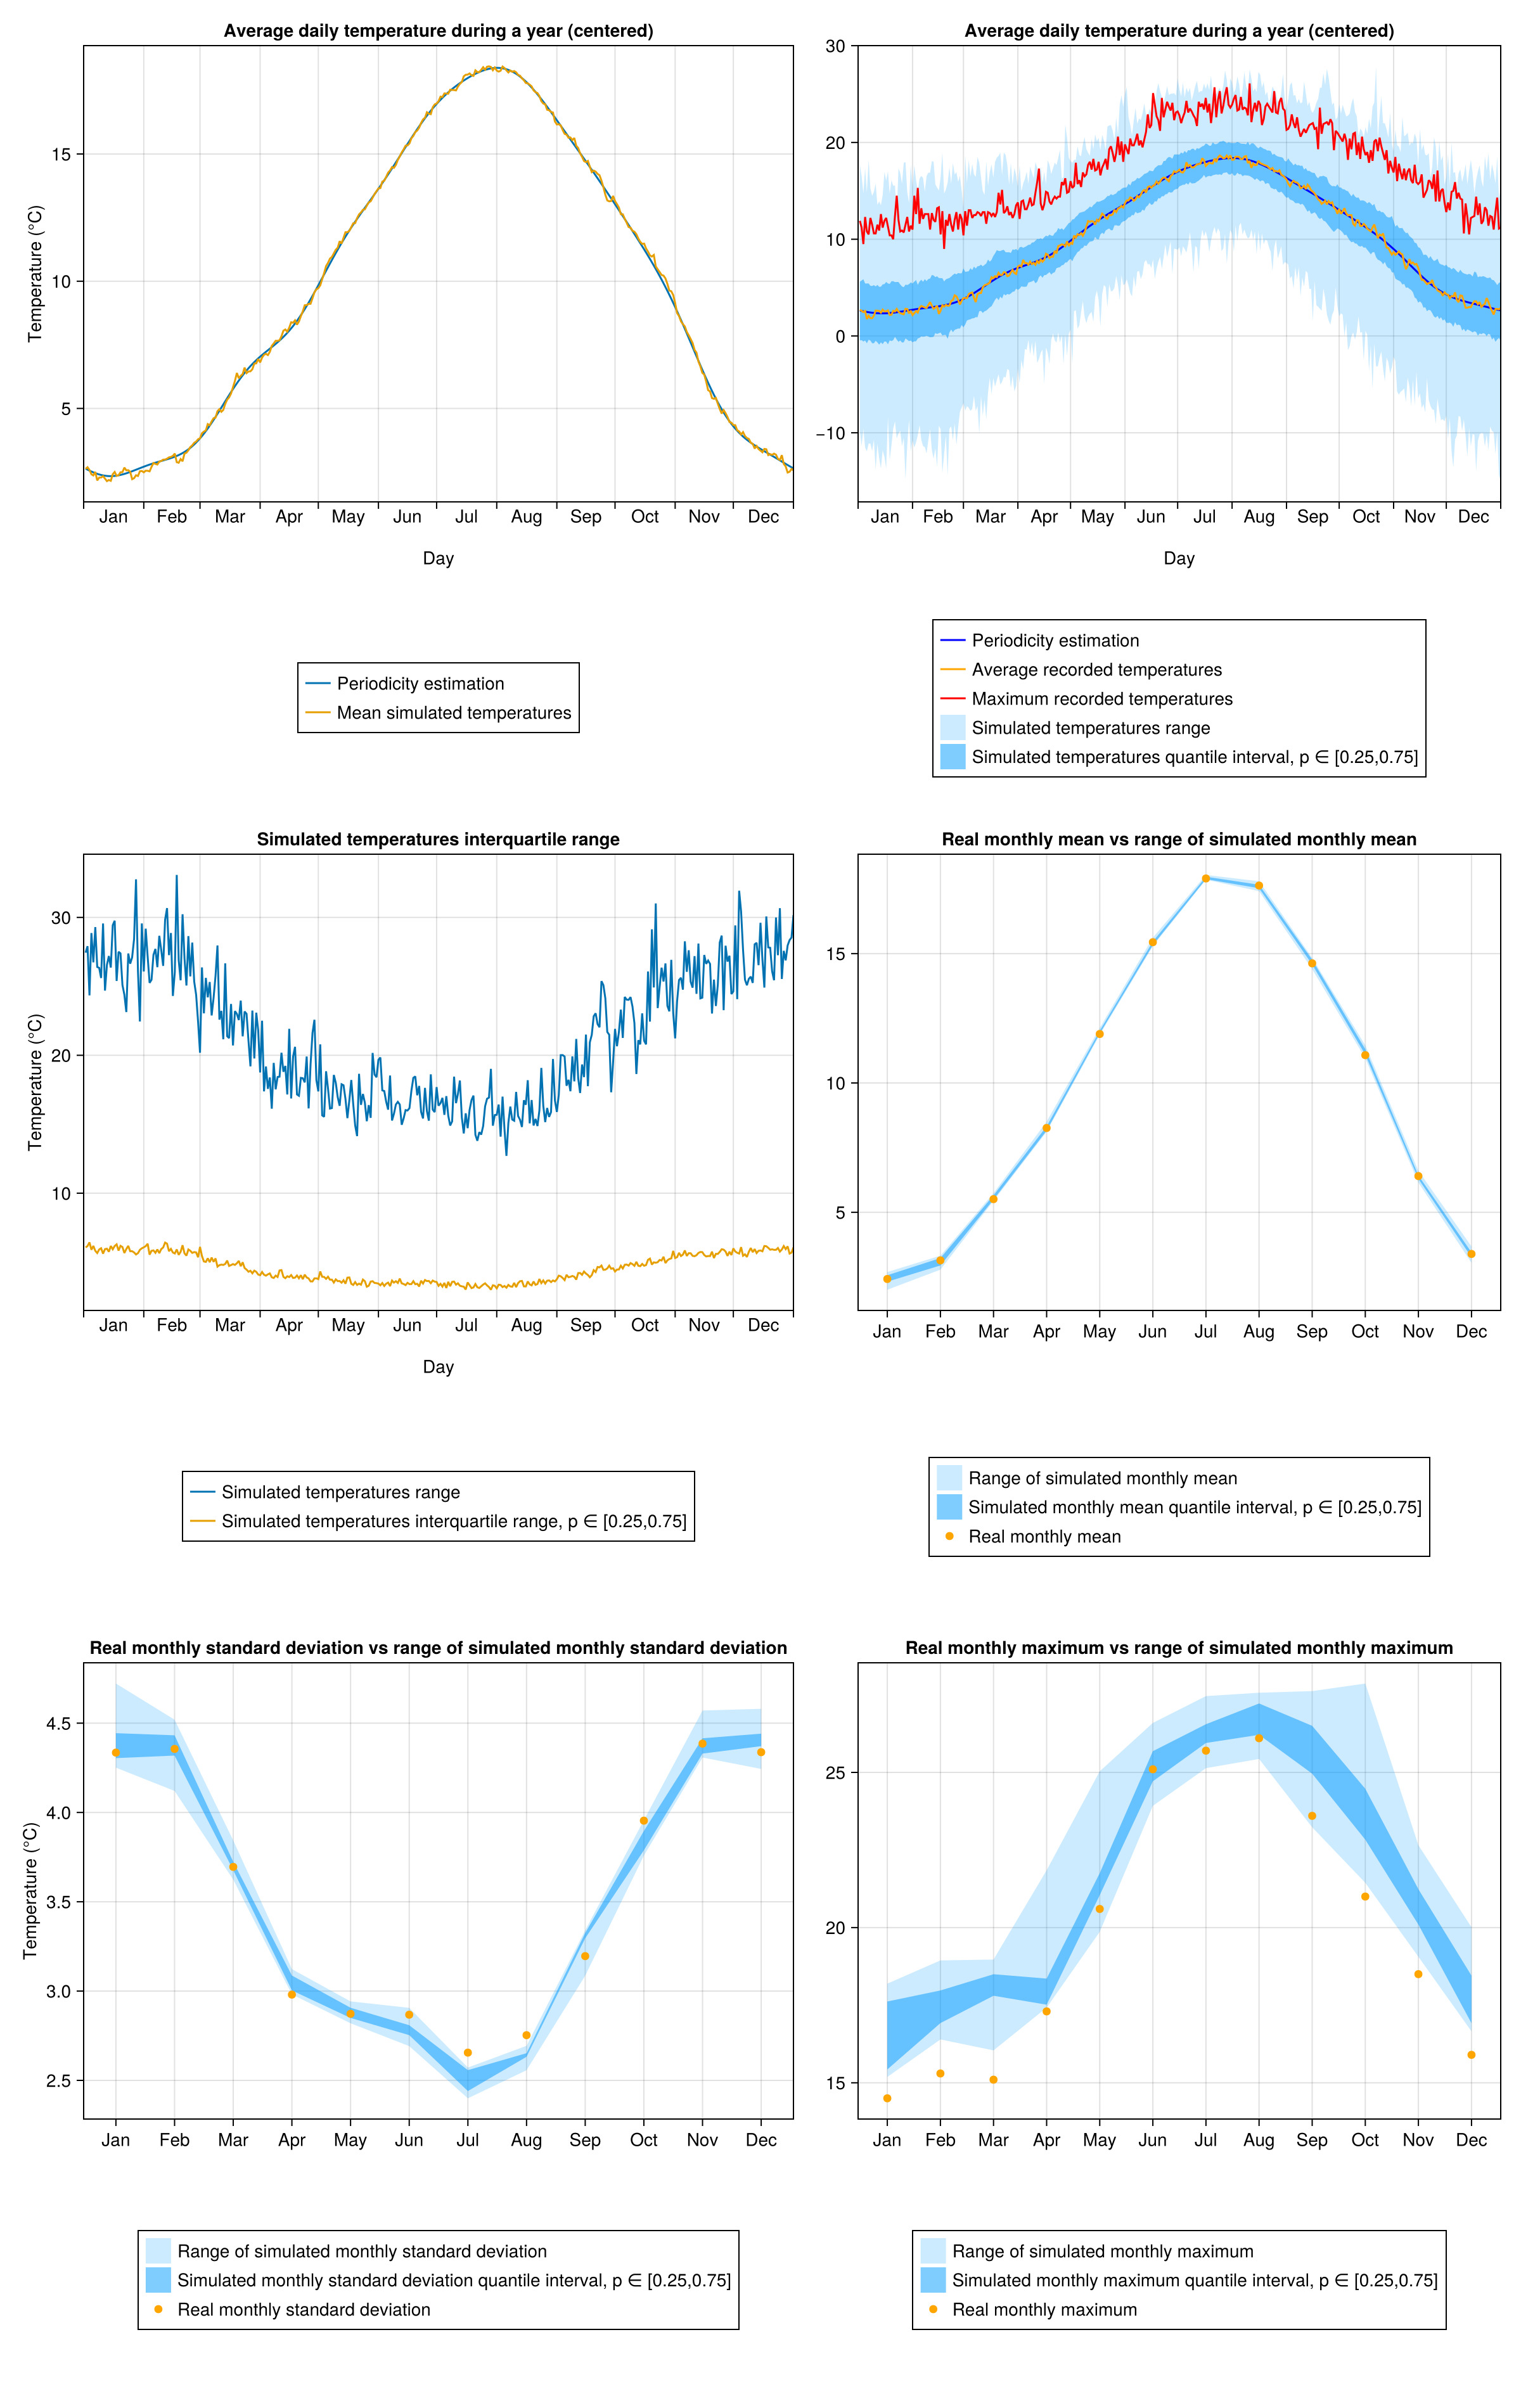

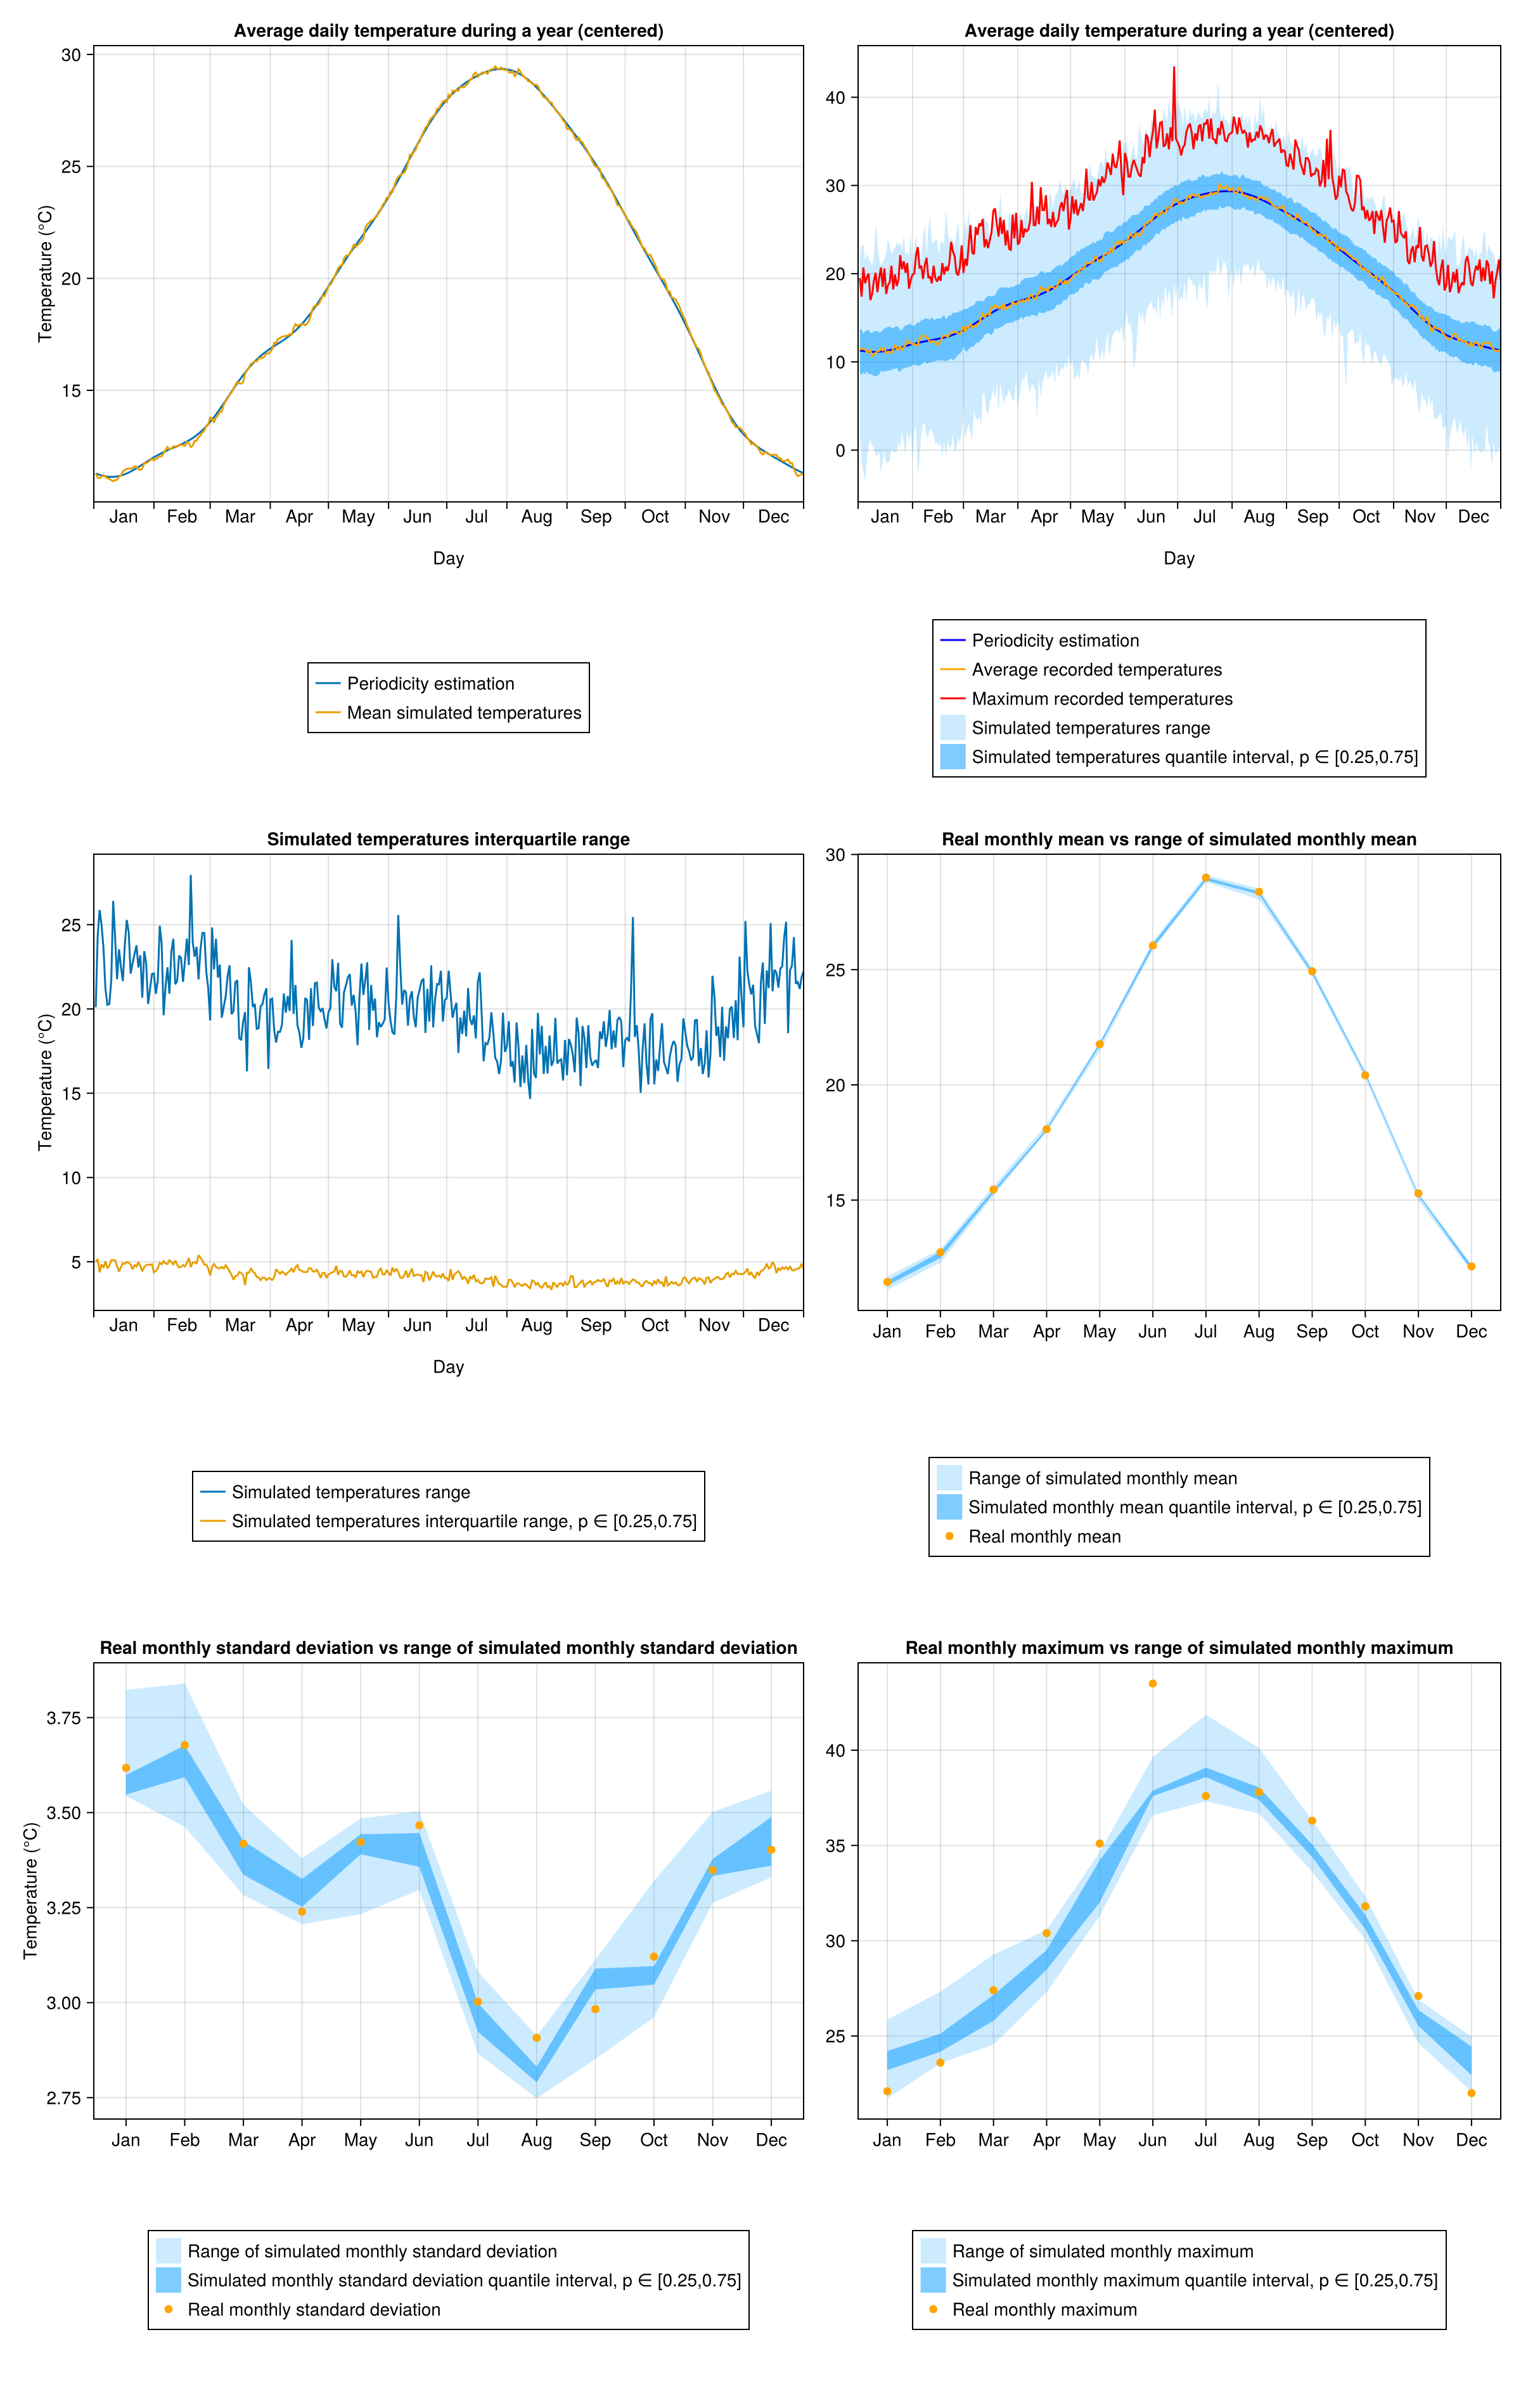

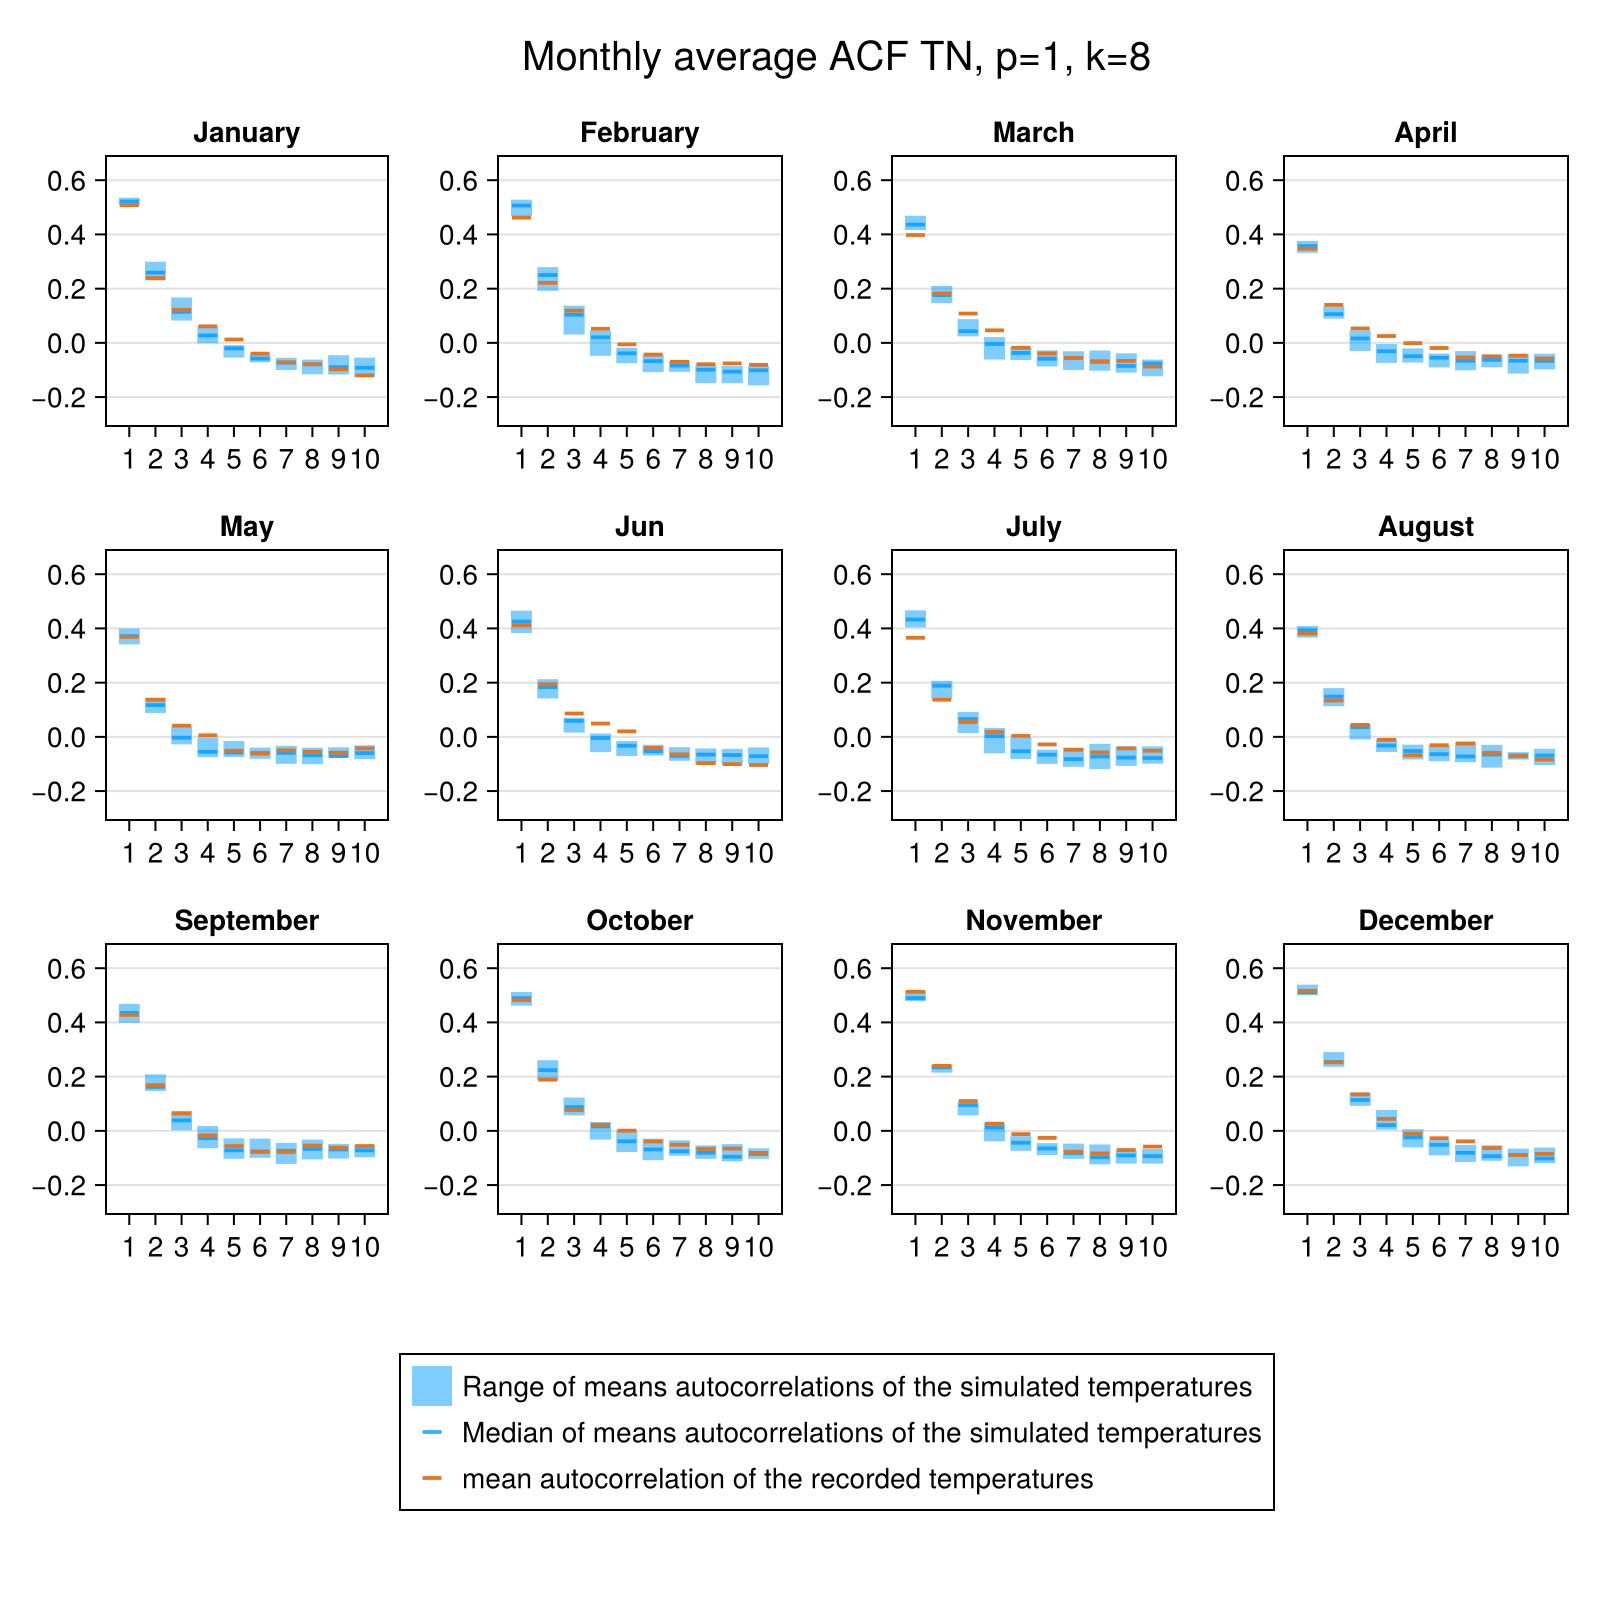

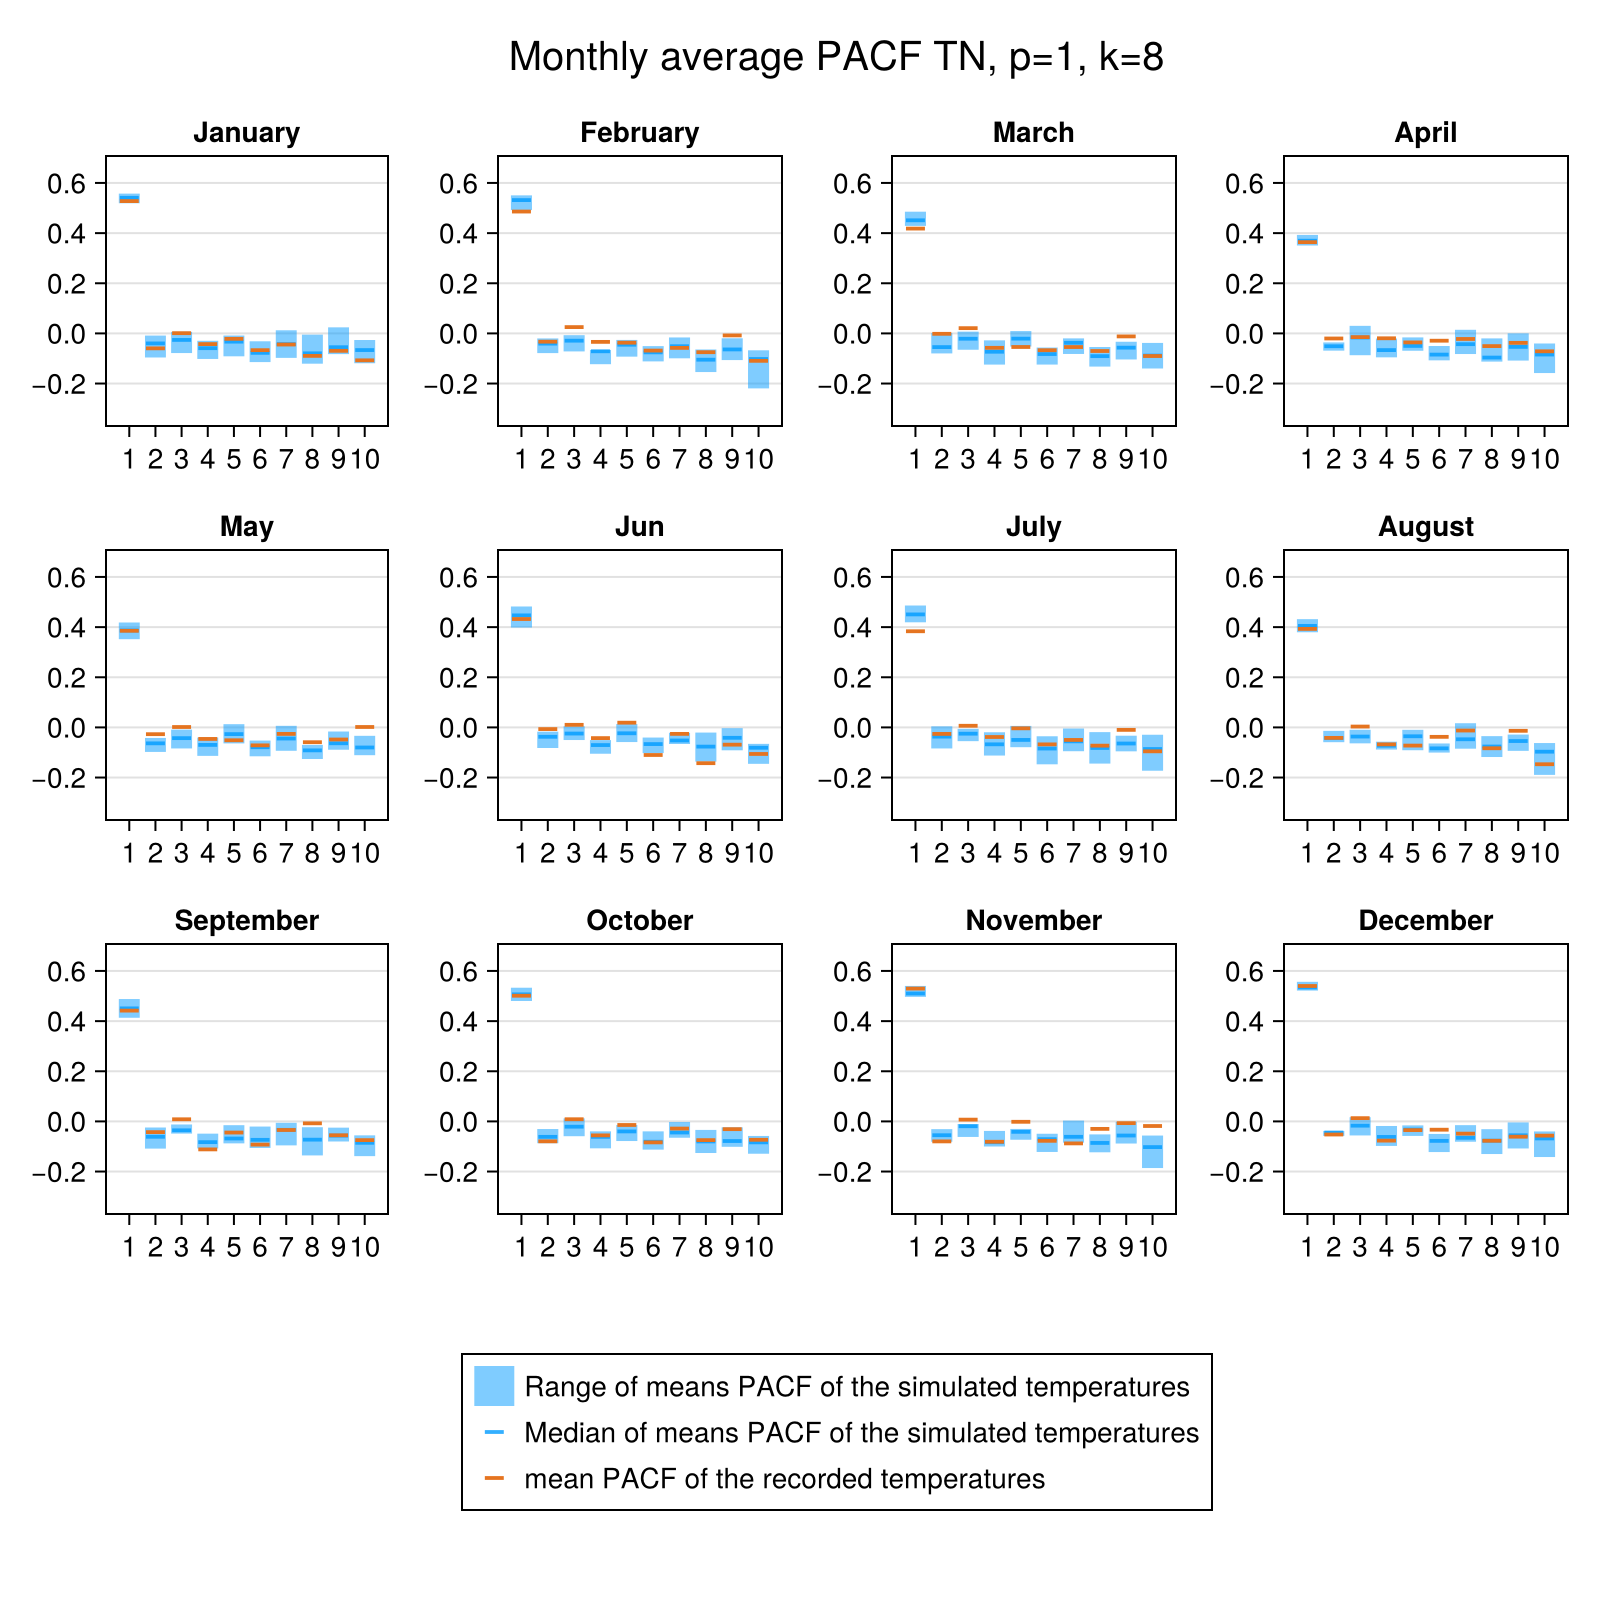

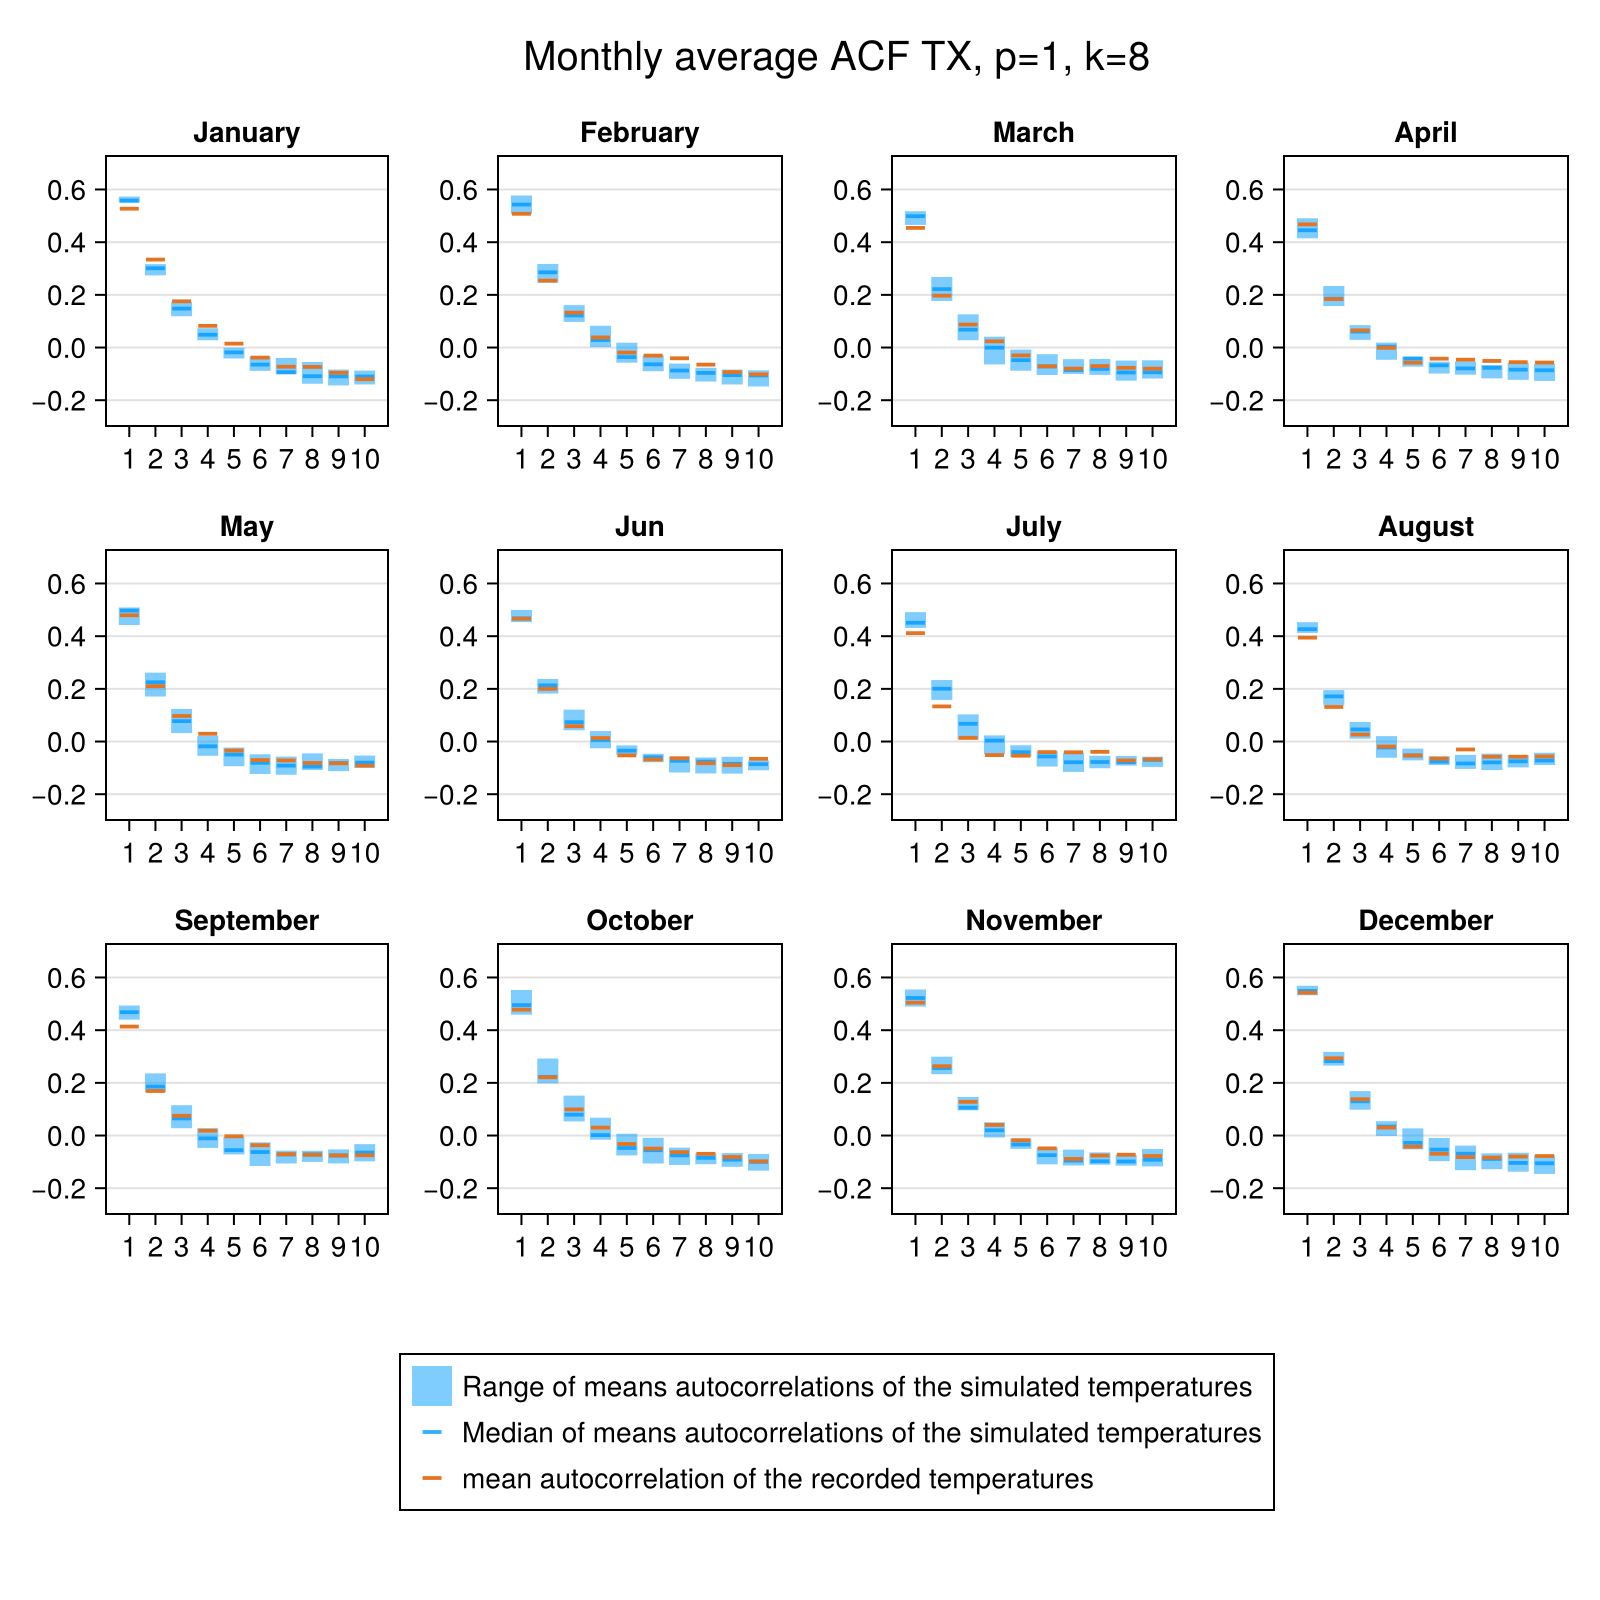

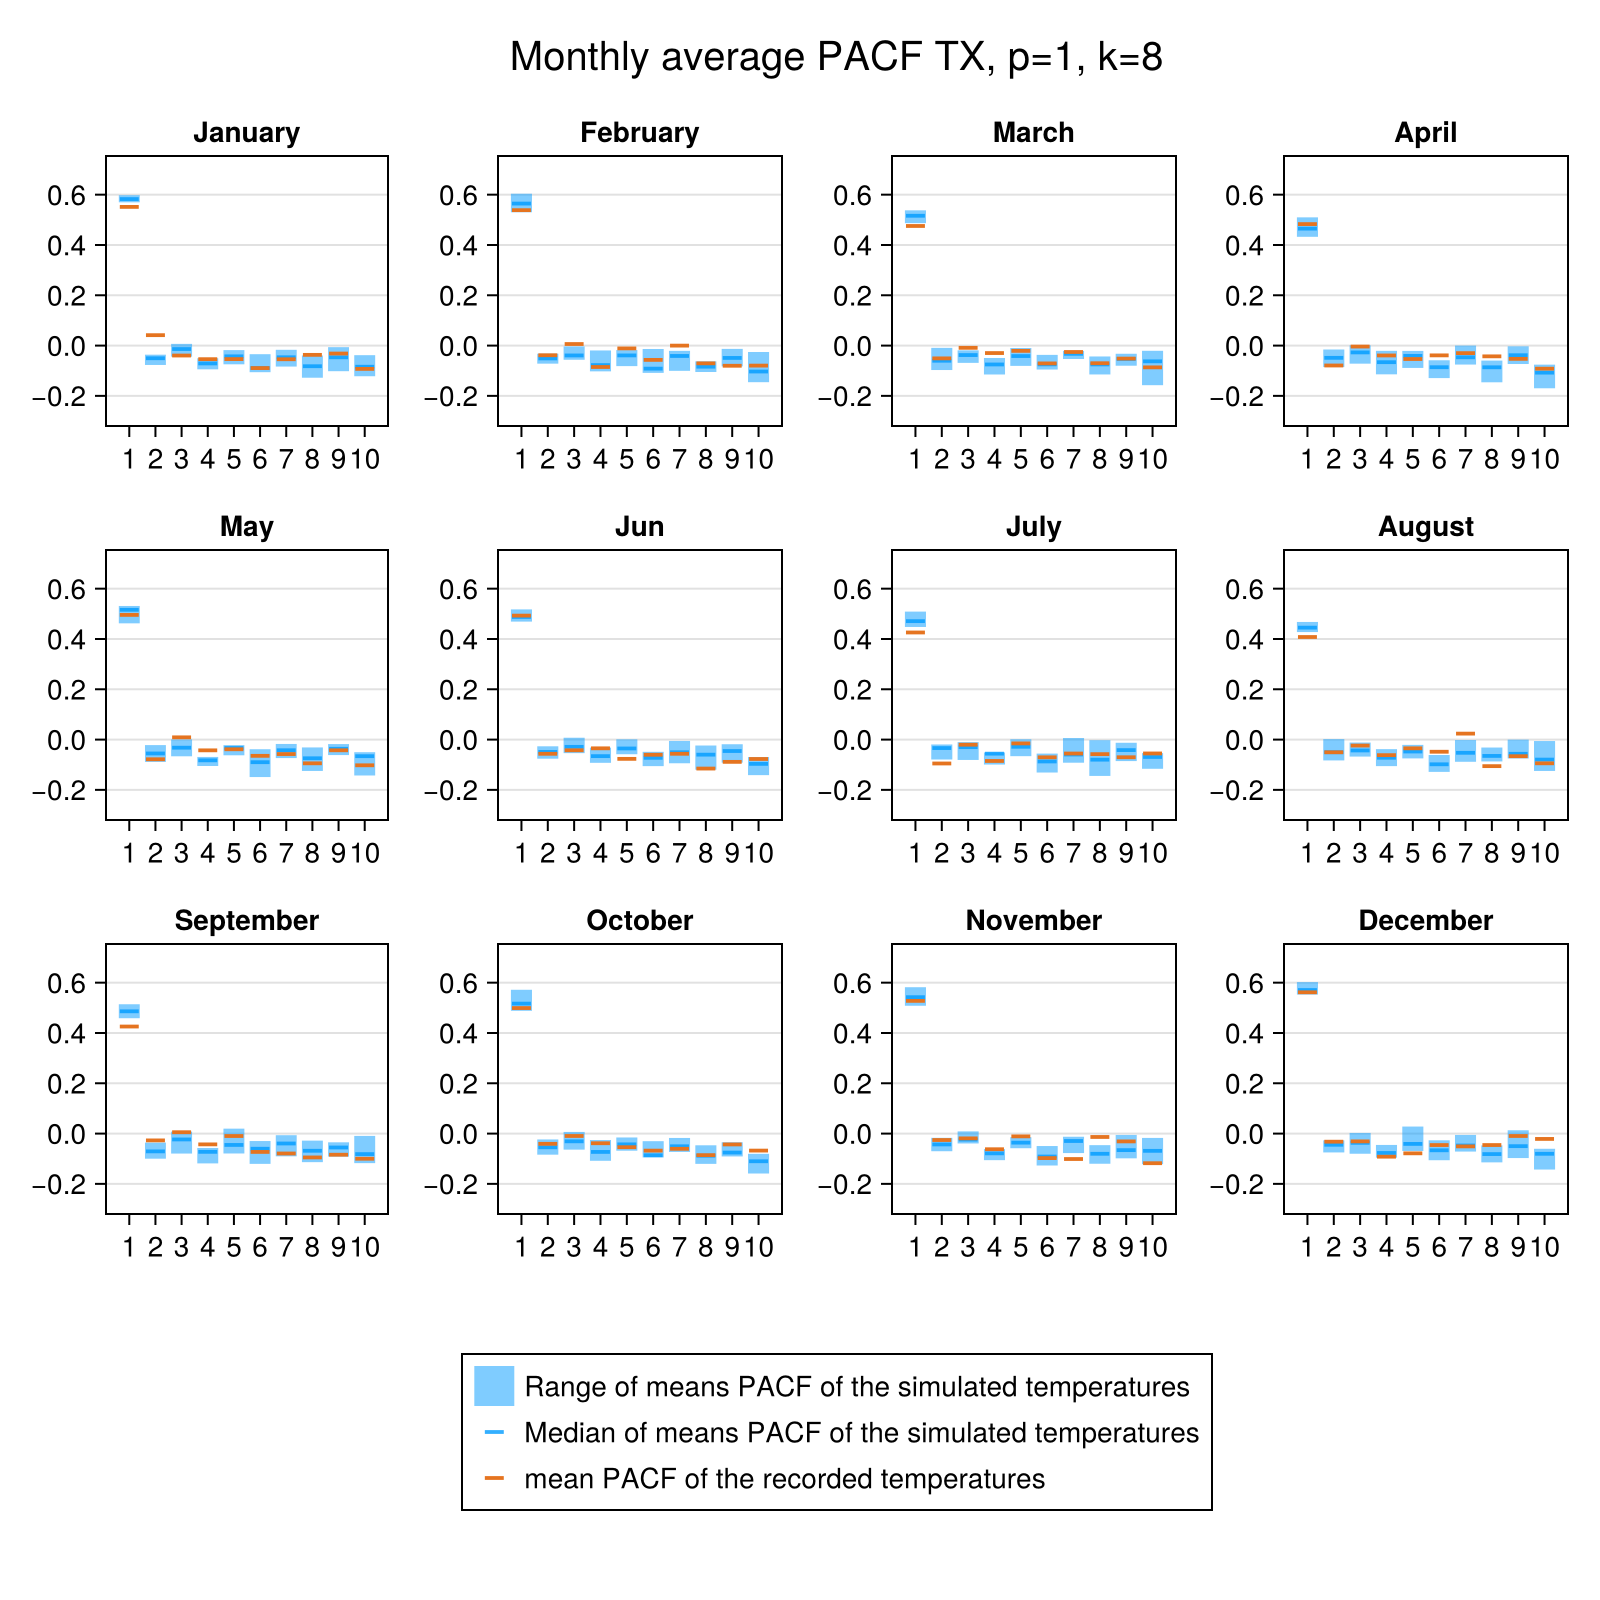

Number of scenarios with dates where TN > TX 10
Percentage of scenarios with dates where TN > TX 100.0 %
Mean percentage of dates where TN > TX : 0.38 %
Median percentage of dates where TN > TX : 0.39 %


In [8]:
fig_tuple = Sample_diagnostic(sample_, Caracteristics_Series_vec, Model, folder=folder_results, settings=settings)
save_model(Model, folder_results * "/model.jld2")
display.(fig_tuple)
println("Number of scenarios with dates where TN > TX $(sum(TN_Grt_TX.(sample_) .> 0))")
println("Percentage of scenarios with dates where TN > TX $(trunc(100*sum(TN_Grt_TX.(sample_) .> 0)/length(sample_),digits=2)) %")
println("Mean percentage of dates where TN > TX : $(trunc(100*mean(TN_Grt_TX.(sample_))/length(Model.date_vec),digits=2)) %")
println("Median percentage of dates where TN > TX : $(trunc(100*median(TN_Grt_TX.(sample_))/length(Model.date_vec),digits=2)) %")